In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
# %pip install -i https://test.pypi.org/simple/ dbscan2==0.0.3

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hypertools as hyp

from sklearn.cluster import DBSCAN
import sklearn.utils
from scipy.spatial import euclidean
from DBCV import DBCV

%matplotlib inline
sns.set_context("poster")
sns.set_style("white")
sns.set_color_codes()
plot_kwds = {"alpha": 0.5, "s": 80, "linewidths": 0}

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [7]:
data = pd.read_csv("../Data/100dim_labeled_synth_data.csv").drop(["Unnamed: 0"], axis=1)

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'labels'}>]], dtype=object)

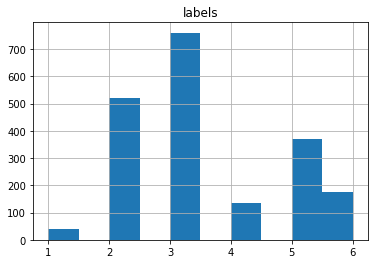

<IPython.core.display.Javascript object>

In [21]:
# determine the number of classes and class imbalance
data.hist(column="labels")

In [33]:
db = DBSCAN(eps=0.9, min_samples=5).fit(data.iloc[:, :-1])

<IPython.core.display.Javascript object>

In [34]:
data["pred"] = db.labels_

<IPython.core.display.Javascript object>

In [35]:
# separate the number of clusters generated from the noise
len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

5

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

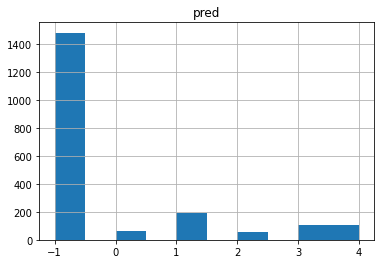

<IPython.core.display.Javascript object>

In [36]:
data.hist(column="pred")

# 3D plots with groups

In [37]:
labels = data.pop("pred")

<IPython.core.display.Javascript object>

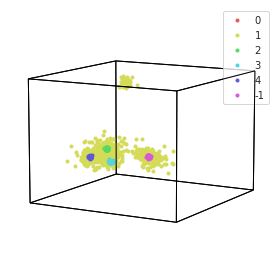

<IPython.core.display.Javascript object>

In [38]:
hyp.plot(data.iloc[:, :-1], ".", group=labels, legend=list(set(labels)))

## reduce with t-SNE

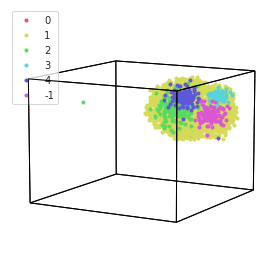

<IPython.core.display.Javascript object>

In [40]:
geo_tsne = hyp.plot(data.iloc[:, :-1], '.', group=labels, legend=list(set(labels)), reduce='TSNE', ndims=3)


## reduce with PCA

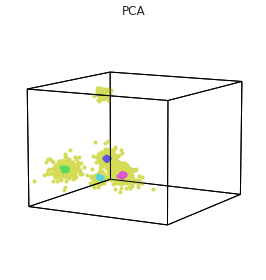

<IPython.core.display.Javascript object>

In [41]:
geo = hyp.plot(data.iloc[:, :-1], '.', group=labels, reduce='PCA', title='PCA')


https://stats.stackexchange.com/questions/270631/why-are-most-of-my-points-classified-as-noise-using-dbscan
I would suggest that, at first instance at least, DBSCAN is provided with the projection scores used to create the scatter-plot shown as inputs. This approach would be effectively Latent Semantic Analysis (LSA). In LSA we use the SVD decomposition of a matrix containing word counts of the text corpus analysed (or a normalised term-document matrix of as the one returned by TFIDF) to investigate the relations between the text-units of the corpus at hand.

In [ ]:
DBCV(X, labels, dist_function=euclidean)